# 目次

- データ確認
- 前処理
- 目的変数との関係を可視化
- 数値変換
  1. 離散化
  2. 分位化
  3. べき乗
  4. スケール変換
  5. 対数変換
  6. Box-Cox変換
  7. ウィンザー化
  8. ロジット返還

# ライブラリ群

In [12]:
# データ処理
import csv
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
from sklearn.preprocessing import StandardScaler

# 評価
from sklearn import metrics

# 描画
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import japanize_matplotlib
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style(style='dark')
from tqdm import tqdm # プログレスバー
mplstyle.use('fast')

# 表示調整
from matplotlib import rcParams
# スタイル・フォントの調整
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
plt.rc('font', **font)
rcParams['font.family'] = 'sans-serif'
# 日本語対応
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']
plt.rcParams["figure.figsize"] = [20,5] # 表示サイズ
plt.rcParams["font.size"] = 10 # 文字サイズ
# HTML対応
from IPython.core.display import display, HTML
# 全表示対応
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# データ確認

In [13]:
churn_modelling = pd.read_csv("./Churn_Modelling.csv")

In [14]:
churn_modelling.shape
churn_modelling.head()

(10000, 14)

,行番号,顧客ID,姓,クレジットカードスコア,地理,性別,年齢,在職期間,残高,製品数,クレジットカード有無,正会員区分,推定給与,退会区分
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
1,2,15647311,Hill,608,Spain,Female,41,1,83808,1,0,1,112543,0
2,3,15619304,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93827,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084,0


In [15]:
# 欠損値
missing_values = pd.DataFrame()
for column in churn_modelling.columns:
    missing_values[column] = [churn_modelling[churn_modelling[column].isnull()].shape[0]]
missing_values.T
# 欠損値なし

,0
行番号,0
顧客ID,0
姓,0
クレジットカードスコア,0
地理,0
性別,0
年齢,0
在職期間,0
残高,0
製品数,0


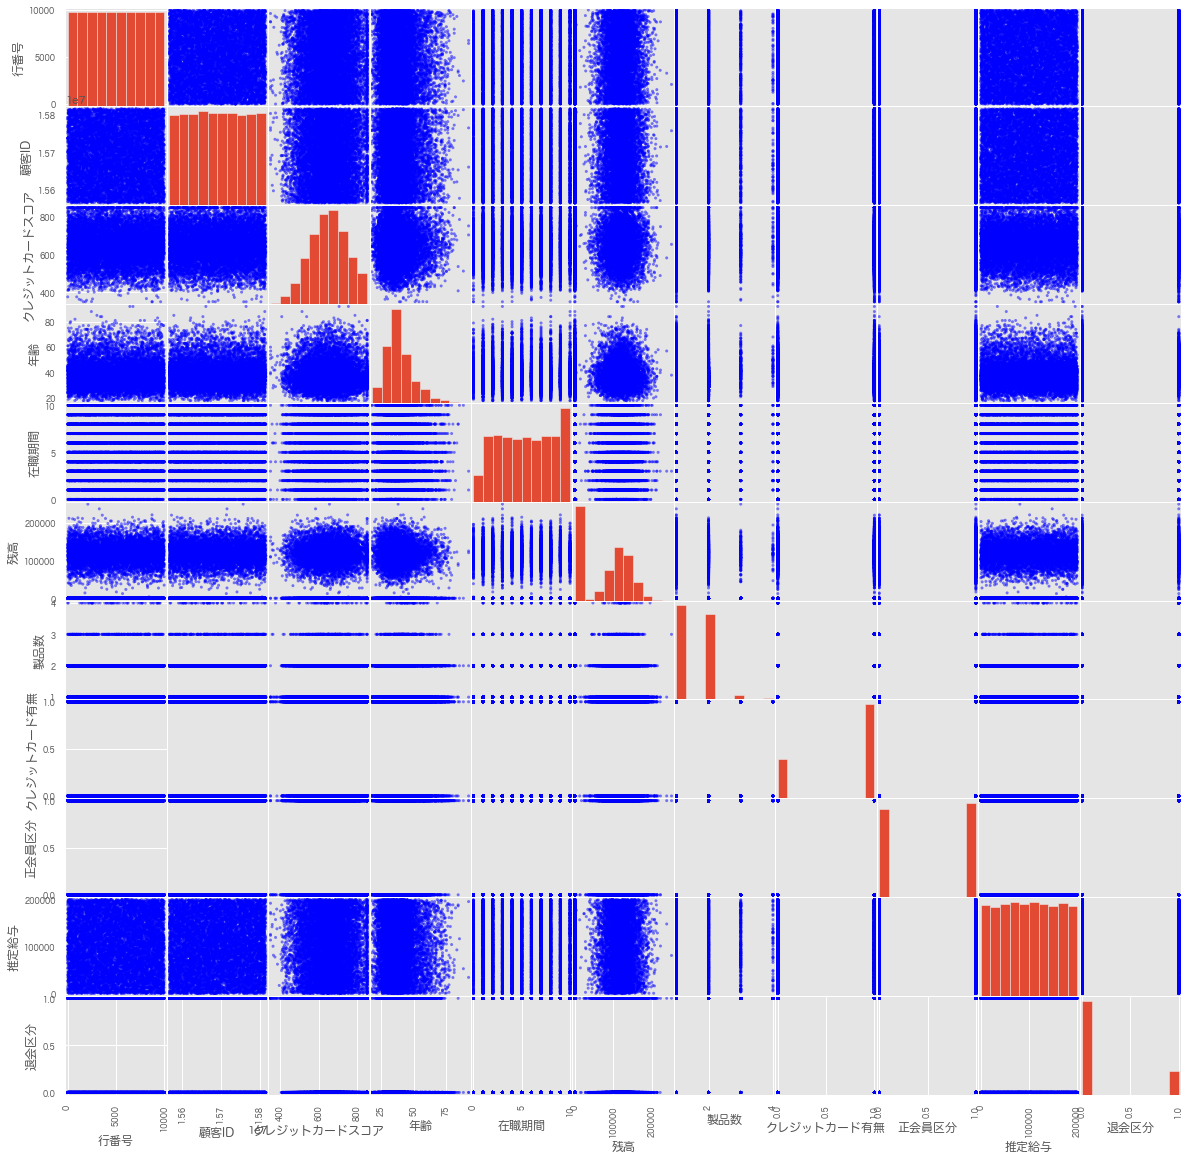

In [16]:
# 散布図行列
pd.plotting.scatter_matrix(churn_modelling, c='blue', figsize=(20, 20))
plt.show();

クレジットカードスコア、年齢、残高を数値変換で使用する。

# 前処理

姓、地理、性別の変換

In [17]:
#　「姓」列の削除、目的変数と無関係
df = churn_modelling
df = df.drop(columns='姓', axis=1)
df.head()

,行番号,顧客ID,クレジットカードスコア,地理,性別,年齢,在職期間,残高,製品数,クレジットカード有無,正会員区分,推定給与,退会区分
0,1,15634602,619,France,Female,42,2,0,1,1,1,101349,1
1,2,15647311,608,Spain,Female,41,1,83808,1,0,1,112543,0
2,3,15619304,502,France,Female,42,8,159661,3,1,0,113932,1
3,4,15701354,699,France,Female,39,1,0,2,0,0,93827,0
4,5,15737888,850,Spain,Female,43,2,125511,1,1,1,79084,0


In [18]:
df['地理'].value_counts()
df['性別'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: 地理, dtype: int64

Male      5457
Female    4543
Name: 性別, dtype: int64

In [19]:
# 「地理」はダミーコーディング
df = pd.get_dummies(df, columns=['地理'], prefix='地理', prefix_sep='_', drop_first=True)
df.head()

,行番号,顧客ID,クレジットカードスコア,性別,年齢,在職期間,残高,製品数,クレジットカード有無,正会員区分,推定給与,退会区分,地理_Germany,地理_Spain
0,1,15634602,619,Female,42,2,0,1,1,1,101349,1,0,0
1,2,15647311,608,Female,41,1,83808,1,0,1,112543,0,0,1
2,3,15619304,502,Female,42,8,159661,3,1,0,113932,1,0,0
3,4,15701354,699,Female,39,1,0,2,0,0,93827,0,0,0
4,5,15737888,850,Female,43,2,125511,1,1,1,79084,0,0,1


In [20]:
# 「性別」はLabelエンコーディング
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['性別'] = lb.fit_transform(df['性別'])
df.head()

,行番号,顧客ID,クレジットカードスコア,性別,年齢,在職期間,残高,製品数,クレジットカード有無,正会員区分,推定給与,退会区分,地理_Germany,地理_Spain
0,1,15634602,619,0,42,2,0,1,1,1,101349,1,0,0
1,2,15647311,608,0,41,1,83808,1,0,1,112543,0,0,1
2,3,15619304,502,0,42,8,159661,3,1,0,113932,1,0,0
3,4,15701354,699,0,39,1,0,2,0,0,93827,0,0,0
4,5,15737888,850,0,43,2,125511,1,1,1,79084,0,0,1


# 目的変数との関係を可視化

In [23]:
def target_relation(tgt, data):
    y_train = data[tgt]

    # ヒートマップの表示数
    k = len(churn_modelling.columns) - 1
    fig = plt.figure(figsize=(20,20))

    # 各変数間の相関係数
    corrmat = data.corr()

    # リストの最大値から順にk個の要素を取得
    cols = corrmat.nlargest(k, tgt)[tgt].index

    # 全て可視化
    for i in np.arange(1, k):
        X_train = data[cols[i]]
        ax = fig.add_subplot(5,4, i)
        sns.regplot(x=X_train, y=y_train)
    
    plt.tight_layout()
    plt.show();
#     fig.savefig("figure7.png");

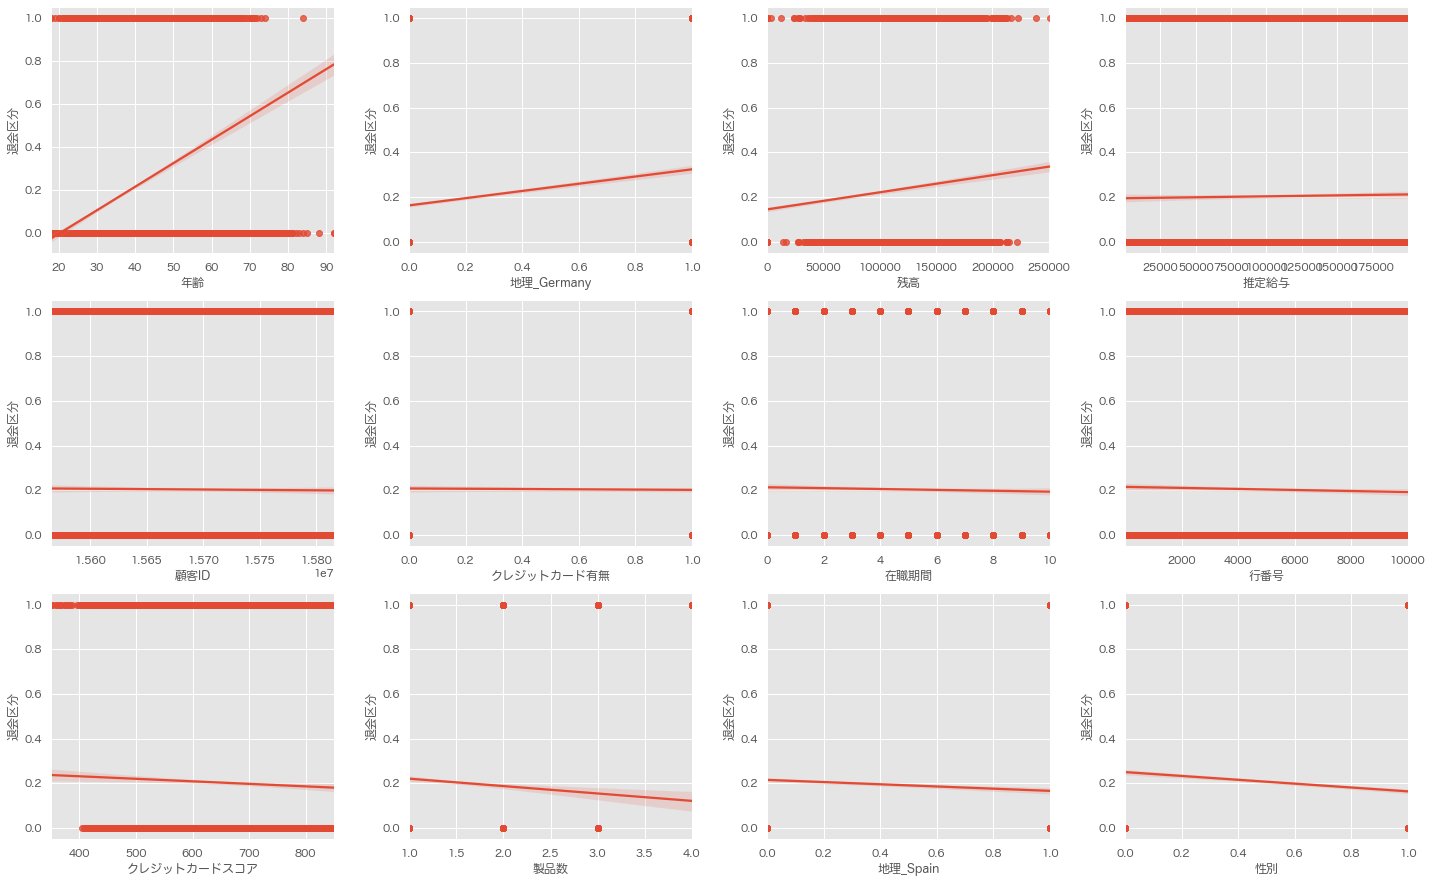

In [24]:
tgt = '退会区分' # 目的変数
data = df
target_relation(tgt, data)

目的変数と線形の強い相関のある変数はなさそう。

# 数値変換

## 離散化（ビニング）

In [25]:
# 年齢（連続値）を5分割、離散値変換
age = df.copy()
age['年齢層'] = pd.cut(age['年齢'], 5)

# 年齢層と退会区分で集計
age[['年齢層', '退会区分']].groupby(['年齢層'], as_index=False).count().sort_values(by='年齢層', ascending=True) # 全レコード数
age[['年齢層', '退会区分']].groupby(['年齢層'], as_index=False).sum().sort_values(by='年齢層', ascending=True) # 正例数
age[['年齢層', '退会区分']].groupby(['年齢層'], as_index=False).mean().sort_values(by='年齢層', ascending=True) # 平均（正例が50%以上を1とする）

,年齢層,退会区分
0,"(17.926, 32.8]",2790
1,"(32.8, 47.6]",5500
2,"(47.6, 62.4]",1351
3,"(62.4, 77.2]",335
4,"(77.2, 92.0]",24


,年齢層,退会区分
0,"(17.926, 32.8]",213
1,"(32.8, 47.6]",1035
2,"(47.6, 62.4]",716
3,"(62.4, 77.2]",72
4,"(77.2, 92.0]",1


,年齢層,退会区分
0,"(17.926, 32.8]",0
1,"(32.8, 47.6]",0
2,"(47.6, 62.4]",1
3,"(62.4, 77.2]",0
4,"(77.2, 92.0]",0


年齢層別の正例数とその割合を算出

## 分位化

In [26]:
# 十分位数を求める（pandas.dataframe.quantile）
deciles = df['残高'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0        0
0        0
0        0
0    73081
0    97199
1   110139
1   122030
1   133710
1   149245
Name: 残高, dtype: float64

In [27]:
# 十分位数を求める（pandas.Series）
count_siries = pd.Series(df['残高'])
count_siries.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
count_siries

0        0
0        0
0        0
0    73081
0    97199
1   110139
1   122030
1   133710
1   149245
Name: 残高, dtype: float64

0           0
1       83808
2      159661
3           0
4      125511
        ...  
9995        0
9996    57370
9997        0
9998    75075
9999   130143
Name: 残高, Length: 10000, dtype: float64

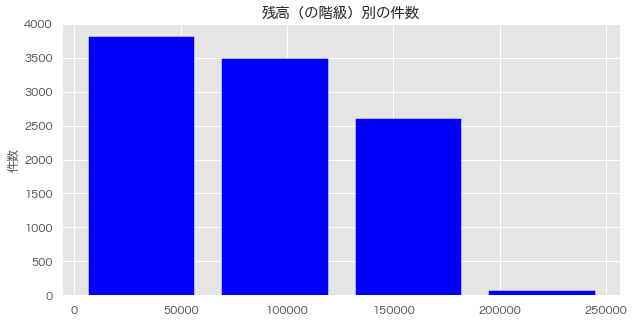

In [28]:
# 四位数をヒストグラムで可視化する
plt.figure(figsize=[10,5])
plt.hist(df['残高'], rwidth=0.8, color='blue', bins=4) # 4個の階級に分割
plt.title('残高（の階級）別の件数')
plt.ylabel('件数')
plt.show();

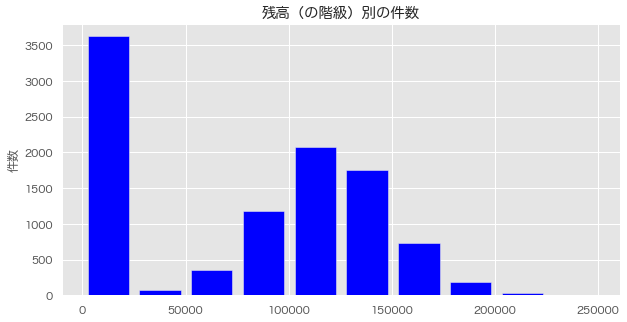

In [29]:
# 十分位数をヒストグラムで可視化する
plt.figure(figsize=[10,5])
plt.hist(df['残高'], rwidth=0.8, color='blue', bins=10) # 10個の階級に分割
plt.title('残高（の階級）別の件数')
plt.ylabel('件数')
plt.show();

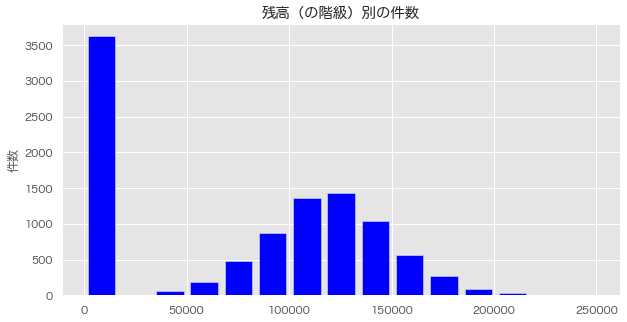

In [30]:
# 十五分位数をヒストグラムで可視化する
plt.figure(figsize=[10,5])
plt.hist(df['残高'], rwidth=0.8, color='blue', bins=15) # 15個の階級に分割
plt.title('残高（の階級）別の件数')
plt.ylabel('件数')
plt.show();

十分位数程度がデータを表すのにちょうど良い階級となりそうである。

## べき乗

In [31]:
10**2
10**-2
10**(1/2)
10**0.5
10*0

100

0.01

3.1622776601683795

3.1622776601683795

0

## スケール変換

### StandardScaler

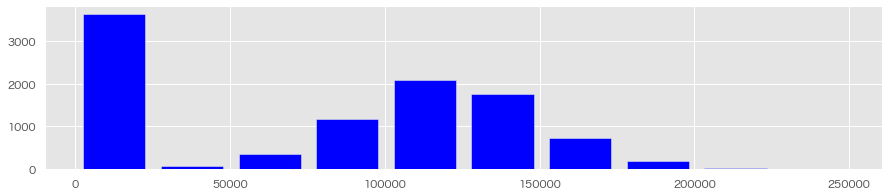

In [32]:
plt.figure(figsize=[15,3])
plt.hist(df['残高'], rwidth=0.8, color='blue', bins=10);

In [33]:
from sklearn.preprocessing import StandardScaler

std = df.copy()
scaler = StandardScaler()
std['残高'] = scaler.fit_transform(std[['残高']])
std['残高'].head().astype(str)

0    -1.2258476714090278
1    0.11735002143511059
2     1.3330533457228904
3    -1.2258476714090278
4     0.7857278997960591
Name: 残高, dtype: object

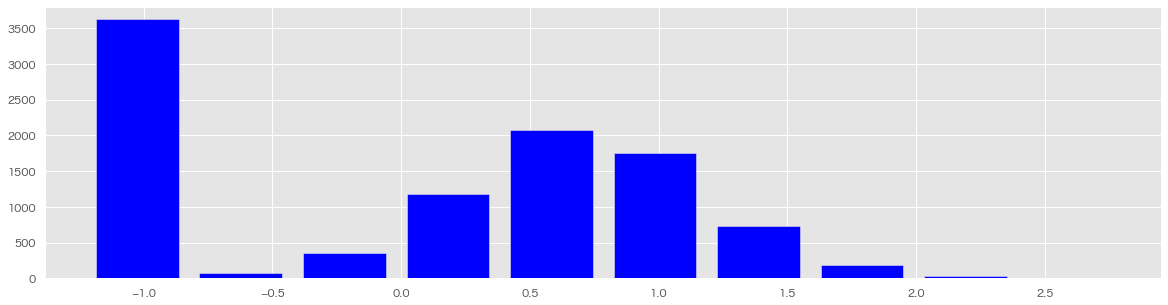

In [34]:
plt.hist(std['残高'], rwidth=0.8, color='blue', bins=10);

分布の形状は変わらない。

### Normalizer

In [35]:
from sklearn.preprocessing import Normalizer

nrm = df.copy()
X = nrm[['残高']].values
X = X.reshape(1, -1)

# 正規化
transformer2 = Normalizer(norm='l2').fit(X)
nl2 = transformer2.transform(X)

# データフレームに変換
nrm_df2 = pd.DataFrame(data=nl2.reshape(-1, 1), columns=["正規化_残高"])
nrm_df2.astype(str).head()

,正規化_残高
0,0.0
1,0.008490540194200596
2,0.01617517068015127
3,0.0
4,0.01271545010237794


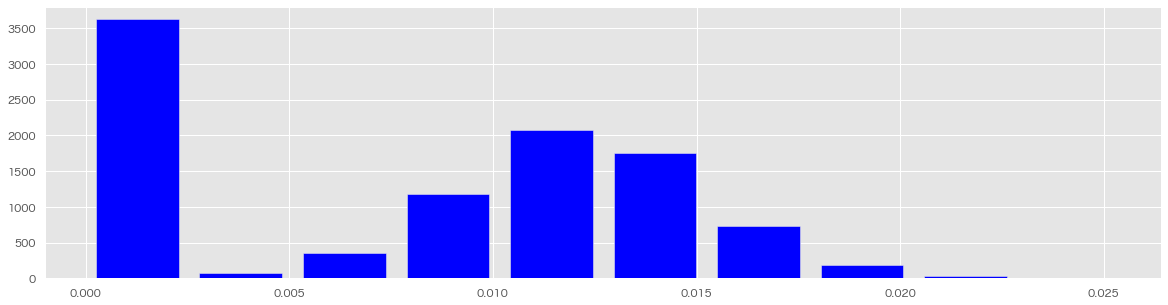

In [36]:
plt.hist(nrm_df2, rwidth=0.8, color='blue', bins=10);

In [37]:
nrm = df.copy()
X = nrm[['残高']].values
X = X.reshape(1, -1)

# 正規化
transformer1 = Normalizer(norm='l1').fit(X)
nl1 = transformer1.transform(X)

# データフレームに変換
nrm_df1 = pd.DataFrame(data=nl1.reshape(-1, 1), columns=["正規化_残高"])
nrm_df1.astype(str).head()

,正規化_残高
0,0.0
1,0.00010957296931520249
2,0.00020874543198264077
3,0.0
4,0.00016409669962442547


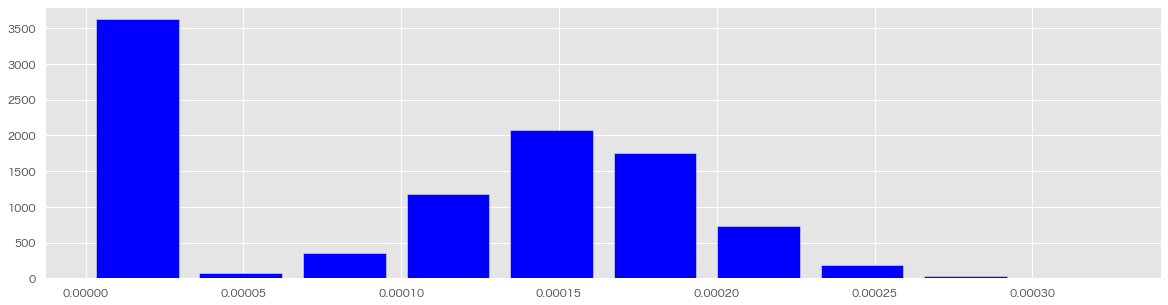

In [38]:
plt.hist(nrm_df1, rwidth=0.8, color='blue', bins=10);

分布の形状に変化なし。ただしスケールは変化あり。

### MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

mm_df = df.copy()
mm = MinMaxScaler(feature_range=(0, 1), copy=False)
mm_df['残高_mm'] = mm.fit_transform(mm_df[['残高']])
mm_df['残高_mm'].astype(str).head()

0                   0.0
1     0.334031478677259
2    0.6363571759354565
3                   0.0
4    0.5002462155052676
Name: 残高_mm, dtype: object

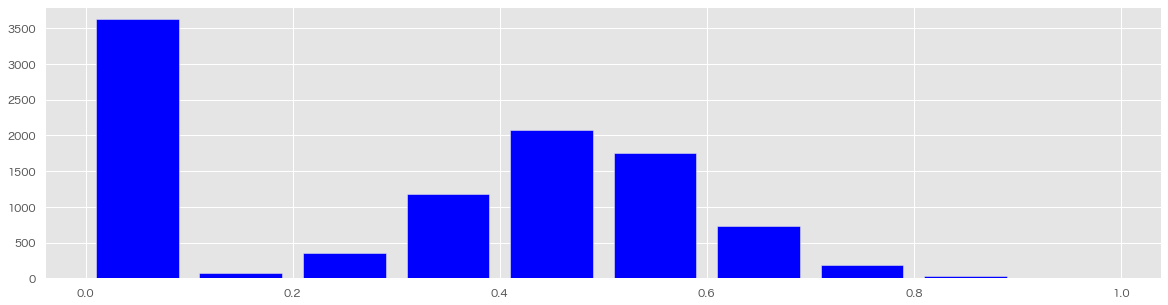

In [40]:
plt.hist(mm_df['残高_mm'], rwidth=0.8, color='blue', bins=10);

分布の形状は変わらない。

## 対数変換

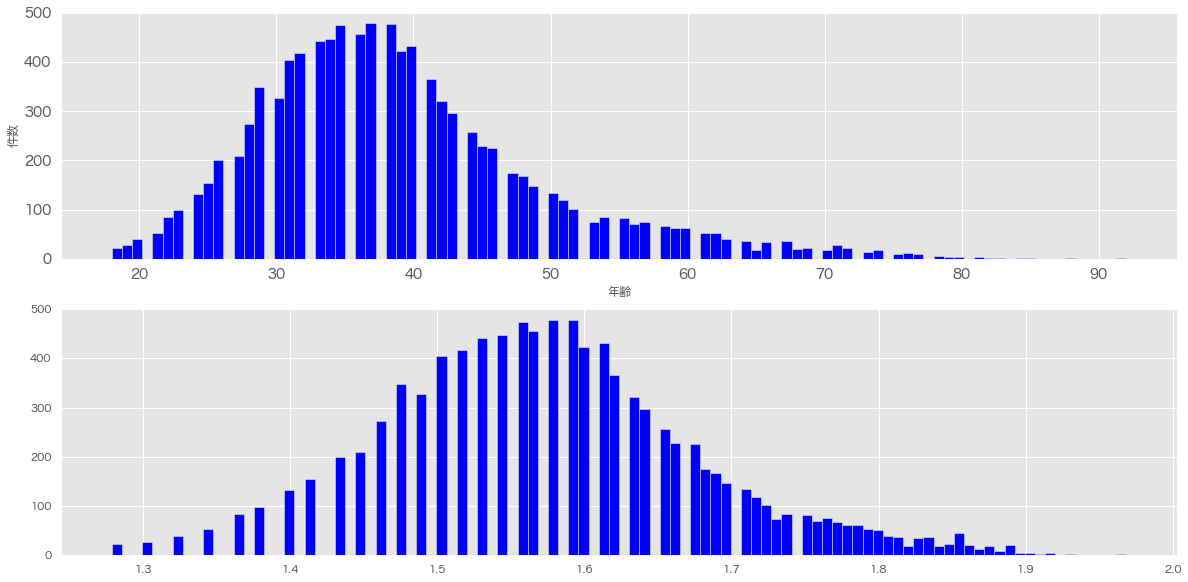

In [41]:
tgt_name = '年齢'
log_tgt_name ='log_年齢'

# 対数変換
df_log = df.copy()
df_log[log_tgt_name] = np.log10(df[tgt_name] + 1)

# 変換前
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[20,10])
df_log[tgt_name].hist(ax=ax1, bins=100, color='blue')
ax1.tick_params(labelsize=14)
ax1.set_xlabel('年齢')
ax1.set_ylabel('件数')

# 変換後
df_log[log_tgt_name].hist(ax=ax2, bins=100, color='blue')
ax1.tick_params(labelsize=14)
ax1.set_xlabel('年齢')
ax1.set_ylabel('件数');

対数変換により正規分布にちかづいていることがわかる。

## Box-Cox変換

In [42]:
from scipy import stats

tgt = '年齢'
bxcx = df.copy()
bxcx[tgt].min()

tgt_log = stats.boxcox(bxcx[tgt], lmbda=0) # 分布の指定
tgt_bc, tgt_params = stats.boxcox(bxcx[tgt]) # 0, 負数を扱えない
tgt_params

18

-0.22419837100454015

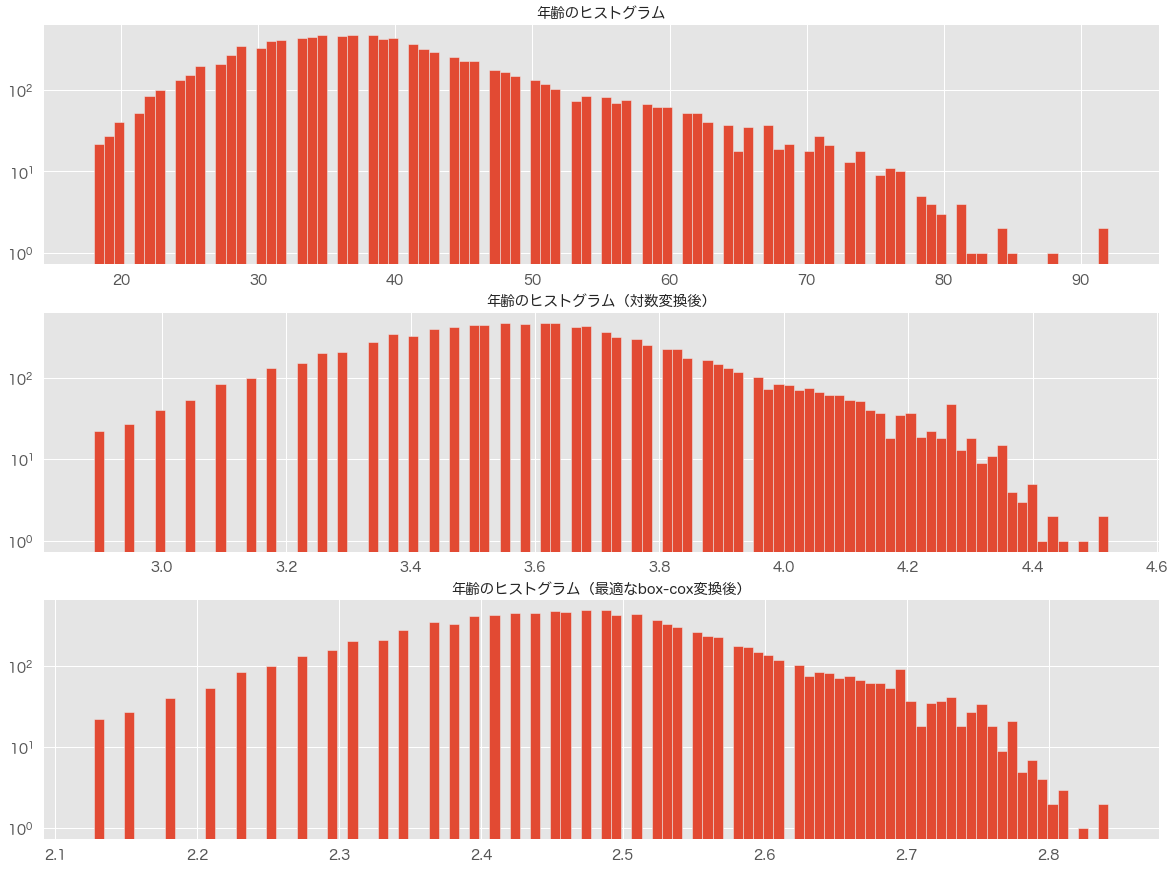

In [43]:
bxcx['tgt_log'] = tgt_log
bxcx['tgt_bc'] = tgt_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

bxcx[tgt].hist(ax=ax1, bins=100, figsize=[20, 15])
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title(f'{tgt}のヒストグラム')

bxcx['tgt_log'].hist(ax=ax2, bins=100, figsize=[20, 15])
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title(f'{tgt}のヒストグラム（対数変換後）')

bxcx['tgt_bc'].hist(ax=ax3, bins=100, figsize=[20, 15]);
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title(f'{tgt}のヒストグラム（最適なbox-cox変換後）');

λ=0を指定し、正規分布に近しい分布に変換した結果

## ウィンザー化

In [44]:
# パーセンタイルの取得
tgt = '推定給与'
Q1 = df[tgt].quantile(.25) # 25%
Q3 = df[tgt].quantile(.75) # 第三位分位

# 閾値の算出
IQR = Q3 - Q1

# 四分位範囲（IQR）の1.5倍以上を外れ値とする
threshold = Q3 + 1.5 * IQR

# 外れ値の検出
df_outlier = df[df[tgt].apply(lambda x:x > threshold)]
df_outlier[[tgt]]

,推定給与


外れ値はなし

## ロジット変換

In [45]:
import math
math.log(0.6 / (1 - 0.6))

0.4054651081081642

逆変換は、ロジスティック回帰で用いられる計算式

# 交互作用特徴量

In [46]:
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score # 各評価指標

def learning(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 評価
    print('Accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('Precision = ', precision_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('Recall = ', recall_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('F1 score = ', f1_score(y_true=y_test, y_pred=y_pred).round(decimals=3))
    print('='*20)

    # 混同行列
    y_pred = model.predict(X_test)
    matrix = plot_confusion_matrix(y_pred, y_test)

    return matrix

In [47]:
from sklearn.metrics import confusion_matrix # 混同行列

def plot_confusion_matrix(predict, y_test):
    pred =  np.where(predict > 0.5, 1, 0)
    cm = confusion_matrix(y_test, pred)
    matrix = pd.DataFrame(cm)
    matrix.columns = [['予測_負例(0)', '予測_正例(1)']]
    matrix.index = [['実際_負例(0)', '実際_正例(1)']]
    return matrix

In [48]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split

Interaction = df.copy()
features = ['残高', 'クレジットカードスコア']
X1 = Interaction[features]
y = Interaction['退会区分']

# ペアワイズ交互作用特徴量
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X1)
print(f'生成前の列数: {X1.shape[1]}')
print(f'生成後の列数: {X2.shape[1]}')
print('='*20)

# 目的変数の抽出、データ分割
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.3, random_state=42)

matrix1 = learning(X1_train, X1_test, y_train, y_test)
matrix2 = learning(X2_train, X2_test, y_train, y_test)
matrix1
matrix2

生成前の列数: 2
生成後の列数: 5
Accuracy =  0.761
Precision =  0.256
Recall =  0.12
F1 score =  0.163
Accuracy =  0.761
Precision =  0.261
Recall =  0.125
F1 score =  0.169


,予測_負例(0),予測_正例(1)
実際_負例(0),2213,203
実際_正例(1),514,70


,予測_負例(0),予測_正例(1)
実際_負例(0),2209,207
実際_正例(1),511,73


微妙な差だが予測精度が向上している。